In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

In [2]:
class LinearRegressionNumpy:
    
    def __init__(self, n_features):
        self.W = np.random.normal(-1,1,(n_features,1)) #weights
        self.b = np.random.rand(1) #intercept
        
    def descent(self, delta_W, delta_b, learning_rate):
        #updating the weights with the calculated gradients
        self.W -= learning_rate*delta_W                                                                  
        self.b -= learning_rate*delta_b 
        
    def derivatives(self, X, Y):
        #partial derivative of cost w.r.t the weights
        delta_W = np.sum(np.multiply(((np.matmul(X,self.W)+self.b)-Y), X))*2/X.shape[0] 
        #partial derivative of cost w.r.t the intercept
        delta_b = np.sum(((np.matmul(X,self.W)+self.b)-Y))*2/X.shape[0]                
        return delta_W, delta_b
    
    #fit
    def train(self, X, Y, epochs=50, learning_rate=0.1):
        X = np.array(X).reshape(-1,1)
        Y = np.array(Y).reshape(-1,1)

        self.parameter_cache = []       
        for i in range(epochs):
            
            delta_W, delta_b = self.derivatives(X, Y)
            self.descent(delta_W, delta_b, learning_rate)
            
            self.parameter_cache.append(np.array((self.W,self.b)))
            
        return self.W, self.b, self.parameter_cache

    def predict(self, X):
#         print(X.shape, X.reshape(-1,1).shape)
        product = np.matmul(np.array(X).reshape(-1,1),self.W)+self.b
        return product
    
    

In [7]:
df = pd.read_csv("https://raw.githubusercontent.com/Baakchsu/LinearRegression/master/weight-height.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [8]:
reg_fit_numpy = LinearRegressionNumpy(n_features=1)

In [9]:
# feature engineering?
x_fit = (df['Weight']-df['Weight'].mean())/df['Weight'].std() #standardization of the dataset
y_fit = (df["Height"]-df['Height'].mean())/df["Height"].std()
x_fit.shape, y_fit.shape

((10000,), (10000,))

[0.9247563] 1.2960012171026214e-09
<ipython-input-2-85587c2c488f>:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.parameter_cache.append(np.array((self.W,self.b)))


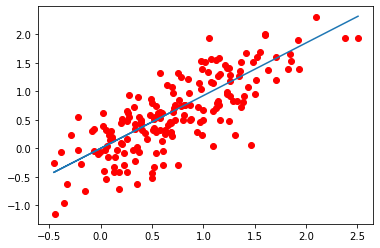

In [10]:
#Numpy plot linear regresion
params = reg_fit_numpy.train(x_fit, y_fit, epochs=90, learning_rate=0.1)

print(params[0][-1], params[1][-1])
plt.scatter(x_fit[:180], y_fit[:180], color='red')
pred_numpy = reg_fit_numpy.predict(np.array(x_fit[:180]))
plt.plot(x_fit[:180], pred_numpy[:180])